In [38]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

#Import time library and the datetime module from the datetime 
import time
from datetime import datetime

In [39]:
# Creat ea set of random latitude and longitude combos
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

# pack the lattitudes and longistudes as pairs by zipping them (connect them together)
lat_lngs = zip(lats, lngs)
lat_lngs

In [40]:
# Add lats and longs to a list
coordinates = list(lat_lngs)

In [41]:
from citipy import citipy

In [42]:
# Create a list to hold the cities
cities = []

#identify the enarest city for each lat and long combos
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, add it to the list
    if city not in cities:
        cities.append(city)
# Print the city count ot confirm sufficient count
len(cities)

629

In [43]:
#Build the URL with your weather api key
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [44]:
# Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through the list of cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes and pause for 60 seconds every set of 50
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count
    record_count += 1
    
#Run an API request for each of the cities with try and except block
    try:
        city_weather = requests.get(city_url).json()
        
        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #conver the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information to the city data list
        city_data.append({"City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date})

#If an error occurs, skip the city
    except:
        print("city not found. Skipping...")
        pass
    
#Indicate that data loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | raga
Processing Record 5 of Set 1 | maltahohe
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | promissao
Processing Record 8 of Set 1 | port lincoln
Processing Record 9 of Set 1 | miasskoye
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | guiratinga
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | emerald
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | nanakuli
Processing Record 18 of Set 1 | lagoa
Processing Record 19 of Set 1 | albemarle
Processing Record 20 of Set 1 | san jeronimo
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | fortuna
Processing Record 23

Processing Record 36 of Set 4 | harper
Processing Record 37 of Set 4 | numan
Processing Record 38 of Set 4 | grand river south east
city not found. Skipping...
Processing Record 39 of Set 4 | axim
Processing Record 40 of Set 4 | bambous virieux
Processing Record 41 of Set 4 | saint anthony
Processing Record 42 of Set 4 | solovetskiy
city not found. Skipping...
Processing Record 43 of Set 4 | padang
Processing Record 44 of Set 4 | atuona
Processing Record 45 of Set 4 | hasaki
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | khatanga
Processing Record 48 of Set 4 | vaitupu
city not found. Skipping...
Processing Record 49 of Set 4 | gazojak
Processing Record 50 of Set 4 | karratha
Processing Record 1 of Set 5 | pskov
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | richmond
Processing Record 4 of Set 5 | heihe
Processing Record 5 of Set 5 | dunedin
Processing Record 6 of Set 5 | tuggurt
city not found. Skipping...
Processing Record 7 of Set 5

Processing Record 25 of Set 8 | victoria
Processing Record 26 of Set 8 | quelimane
Processing Record 27 of Set 8 | lincoln
Processing Record 28 of Set 8 | tiksi
Processing Record 29 of Set 8 | tigzirt
Processing Record 30 of Set 8 | baracoa
Processing Record 31 of Set 8 | ha
city not found. Skipping...
Processing Record 32 of Set 8 | berlevag
Processing Record 33 of Set 8 | triunfo
Processing Record 34 of Set 8 | arroyo
Processing Record 35 of Set 8 | juegang
Processing Record 36 of Set 8 | sault sainte marie
Processing Record 37 of Set 8 | barcelos
Processing Record 38 of Set 8 | jinchang
Processing Record 39 of Set 8 | acopiara
Processing Record 40 of Set 8 | paytug
city not found. Skipping...
Processing Record 41 of Set 8 | cannington
Processing Record 42 of Set 8 | progreso
Processing Record 43 of Set 8 | kamaishi
Processing Record 44 of Set 8 | linxia
Processing Record 45 of Set 8 | phan thiet
Processing Record 46 of Set 8 | golden
Processing Record 47 of Set 8 | nurota
Processing

Processing Record 9 of Set 12 | elmira
Processing Record 10 of Set 12 | kysyl-syr
Processing Record 11 of Set 12 | toropets
Processing Record 12 of Set 12 | sambava
Processing Record 13 of Set 12 | yar-sale
Processing Record 14 of Set 12 | bardiyah
Processing Record 15 of Set 12 | mount isa
Processing Record 16 of Set 12 | lernanist
Processing Record 17 of Set 12 | peace river
Processing Record 18 of Set 12 | milton
Processing Record 19 of Set 12 | flagstaff
Processing Record 20 of Set 12 | dudinka
Processing Record 21 of Set 12 | whitley bay
Processing Record 22 of Set 12 | bilma
Processing Record 23 of Set 12 | umm kaddadah
Processing Record 24 of Set 12 | kitimat
Processing Record 25 of Set 12 | camana
Processing Record 26 of Set 12 | rawson
Processing Record 27 of Set 12 | udachnyy
Processing Record 28 of Set 12 | tual
Processing Record 29 of Set 12 | ust-nera
Processing Record 30 of Set 12 | loreto
Processing Record 31 of Set 12 | eugene
Processing Record 32 of Set 12 | kirakira
P

In [136]:
# Convert the array of dictinaries above to a pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,25.02,49,100,8.01,US,2022-01-27 21:56:28
1,Saint-Philippe,-21.3585,55.7679,71.19,83,70,7.45,RE,2022-01-27 21:57:01
2,Nikolskoye,59.7035,30.7861,29.71,96,100,8.43,RU,2022-01-27 21:57:50
3,Raga,8.4596,25.6780,68.77,22,94,3.69,SS,2022-01-27 21:57:51
4,Maltahohe,-24.8333,16.9833,79.41,30,56,13.60,NA,2022-01-27 21:57:52


In [137]:
#re assign columns:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-01-27 21:56:28,42.0970,-79.2353,25.02,49,100,8.01
1,Saint-Philippe,RE,2022-01-27 21:57:01,-21.3585,55.7679,71.19,83,70,7.45
2,Nikolskoye,RU,2022-01-27 21:57:50,59.7035,30.7861,29.71,96,100,8.43
3,Raga,SS,2022-01-27 21:57:51,8.4596,25.6780,68.77,22,94,3.69
4,Maltahohe,NA,2022-01-27 21:57:52,-24.8333,16.9833,79.41,30,56,13.60


In [169]:
# Add DF to a csv file 
output_data_file = "weather_data/cities.csv"

#Export the city_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

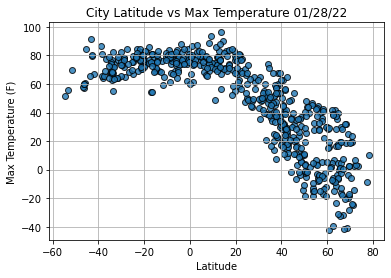

In [170]:
# extract relevant field froms the data frame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

#import time module
import time

#build the scatter plots for lat vs max temp
plt.scatter(lats, max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

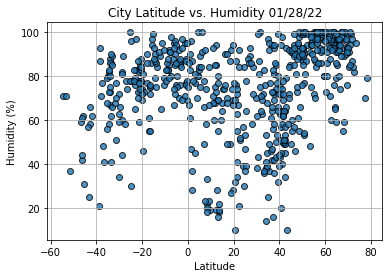

In [171]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

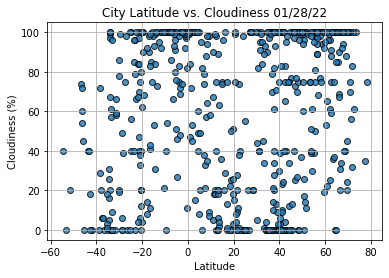

In [172]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

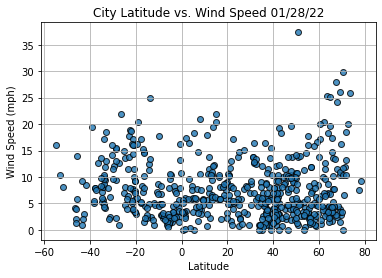

In [173]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [174]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [175]:
#Creating hemisphere dataframes
index13 = city_data_df.loc[13]

index13

City                      Ushuaia
Country                        AR
Date          2022-01-27 21:57:57
Lat                         -54.8
Lng                         -68.3
Max Temp                    51.46
Humidity                       71
Cloudiness                     40
Wind Speed                  16.11
Name: 13, dtype: object

In [184]:
# return a DF with all the data fitting the criteria using loc example: latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-01-27 21:56:28,42.0970,-79.2353,25.02,49,100,8.01
2,Nikolskoye,RU,2022-01-27 21:57:50,59.7035,30.7861,29.71,96,100,8.43
3,Raga,SS,2022-01-27 21:57:51,8.4596,25.6780,68.77,22,94,3.69
8,Miasskoye,RU,2022-01-27 21:57:54,55.2784,61.8905,4.08,100,39,3.11
15,Tuktoyaktuk,CA,2022-01-27 21:57:01,69.4541,-133.0374,-18.40,76,20,10.36


In [185]:
# Assing the dataframe to new variable 
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)].head()
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


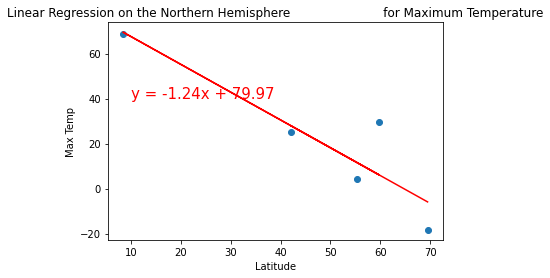

In [203]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature','Max Temp',(10,40))


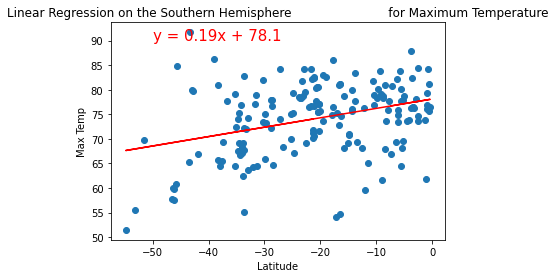

In [204]:

## Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

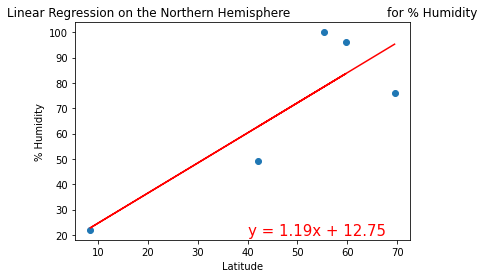

In [206]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))

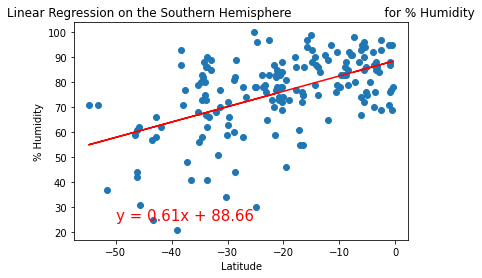

In [209]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \
                       for % Humidity','% Humidity',(-50,25))

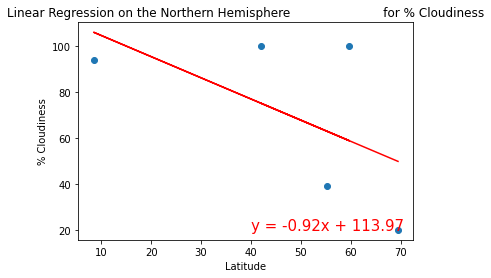

In [210]:
# Linear regression on the Northern Hemisphere percent of cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(40,20))

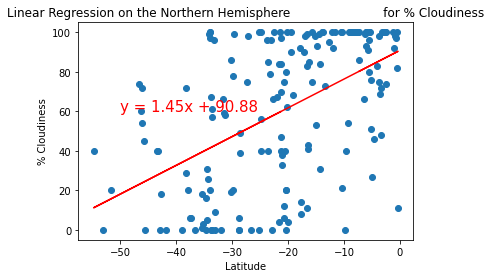

In [227]:
# Linear regression on the Southern Hemisphere percent of cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,60))

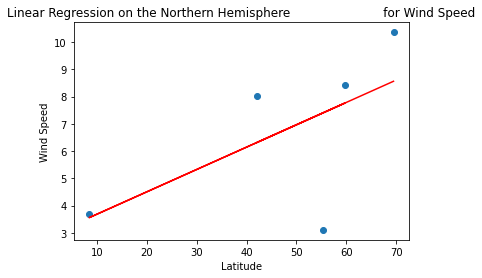

In [237]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed',(10,40))


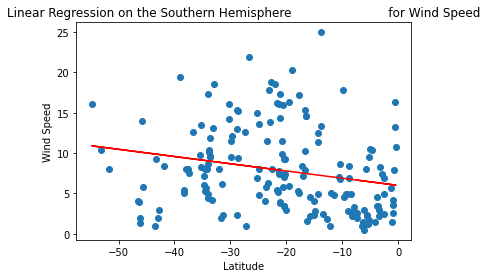

In [236]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
